In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("../salary.csv")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df = data.copy()

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
df.describe().style.background_gradient(cmap='tab20c')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


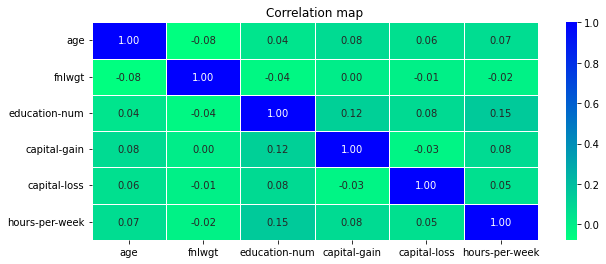

In [20]:
# regardons la matrice de correlation 
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True, cmap='winter_r', fmt='.2f', linewidths=1)
plt.title("Correlation map")
plt.show()

In [22]:
# recherche des valeurs manquantes 
df.isna().sum()/len(df)*100 # diviser et multiplier c'est pour avoir en pourcentage

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [25]:
# le pourcentage total de valeurs manquantes 
print("le pourcentage total de valeurs manquantes est :",df.isna().sum().sum()/len(df)*100)

le pourcentage total de valeurs manquantes est : 0.0


In [26]:
# recherche de valeurs duppliquées 
print(f"le nombre de valeurs dupliquées est : {df.duplicated().sum()}")

le nombre de valeurs dupliquées est : 24


# Analyse univariée

## Etude et Visualisation des variables quantitatives

In [ ]:
numerical = ['education-num','capital-gain','hours-per-week']

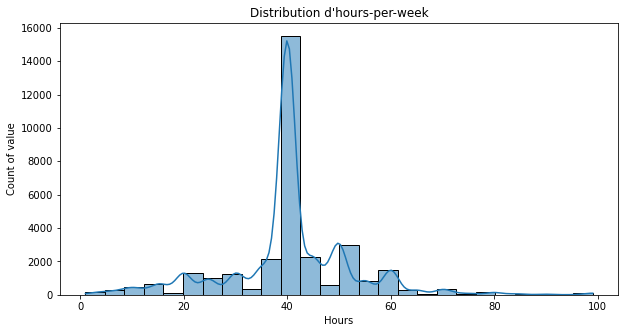

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(x='hours-per-week', bins=26, data=df, kde=True)
plt.title("Distribution d'hours-per-week")
plt.xlabel('Hours')
plt.ylabel("Count of value")
plt.show()

## Etude et Visualisation des variables qualitatives

Text(0, 0.5, "nombre d'individu")

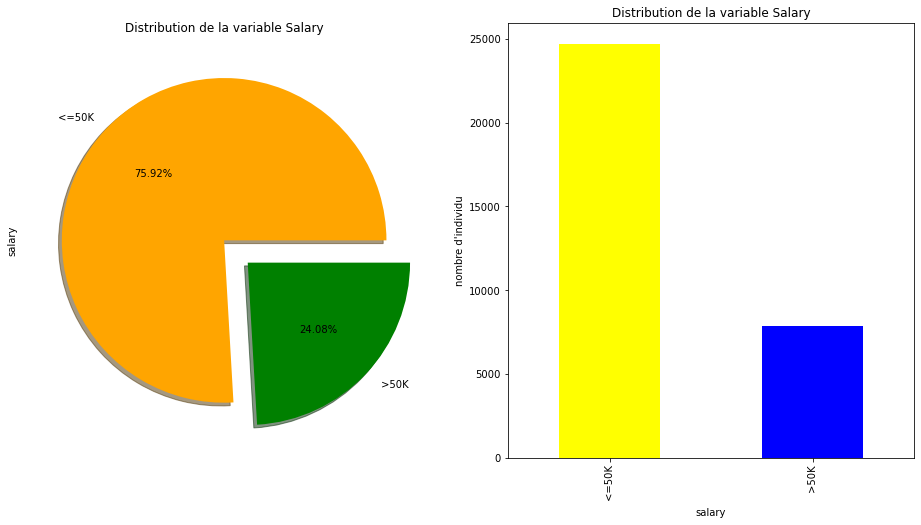

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df['salary'].value_counts().plot(kind='pie',
    explode=[0,0.2],
    #labels=['<=50K','>50K'],
    colors=['orange','green'],
    autopct='%1.2f%%',
    shadow=True,
    title="Distribution de la variable Salary"
        )
plt.subplot(1,2,2)
df['salary'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                             color=["yellow","blue"])
plt.title("Distribution de la variable Salary")
plt.xlabel("salary")
plt.ylabel("nombre d'individu")

# Machine Learning Modeling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [49]:
for col in df.select_dtypes(include='object'):
    labelencoder=LabelEncoder()
    labelencoder.fit(df[col].unique())
    df[col]=labelencoder.transform(df[col])

In [51]:
X=df.drop(['salary'],axis=1)
y=df['salary']

In [52]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [54]:
standard=StandardScaler()
X=standard.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=220)

In [66]:
def machine_learning_model(model,X_train,X_test,y_train,y_test):
    print(f"model {model}")
    model.fit(X_train,y_train)
    print(f"le score d'entrainement est {model.score(X_train, y_train)}")
    y_pred = model.predict(X_test)
    model_score = accuracy_score(y_test, y_pred)
    print(f"\nl'accuracy du {model} est {model_score*100 :.2f}")
    print(f"\n {classification_report(y_test, y_pred)}")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=1)
    plt.show()
    print('-'*50)

In [56]:
models = {
    'logistic':LogisticRegression(penalty='l2'),
    'decison':DecisionTreeClassifier(criterion='gini',splitter='best',),
    'Random':RandomForestClassifier(n_estimators=50,criterion='gini'),
    'Knn':KNeighborsClassifier(),
    'xgb':XGBClassifier(),
    'catboost':CatBoostClassifier(iterations=1)
}

In [57]:
len(models)

6

model LogisticRegression()
le score d'entrainement est 0.8231342137592138

l'accuracy du LogisticRegression() est 83.37

               precision    recall  f1-score   support

           0       0.85      0.94      0.90      4985
           1       0.72      0.47      0.57      1528

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.73      6513
weighted avg       0.82      0.83      0.82      6513



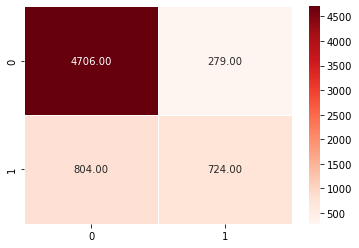

--------------------------------------------------
model DecisionTreeClassifier()
le score d'entrainement est 0.9999616093366094

l'accuracy du DecisionTreeClassifier() est 81.48

               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4985
           1       0.60      0.63      0.62      1528

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.82      6513



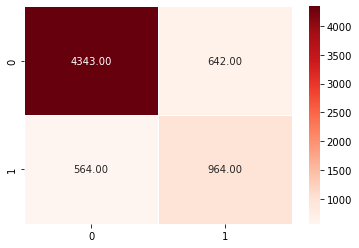

--------------------------------------------------
model RandomForestClassifier(n_estimators=50)
le score d'entrainement est 0.999654484029484

l'accuracy du RandomForestClassifier(n_estimators=50) est 85.74

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4985
           1       0.73      0.63      0.67      1528

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



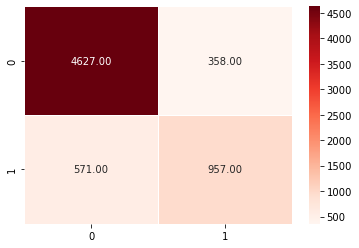

--------------------------------------------------
model KNeighborsClassifier()
le score d'entrainement est 0.8778025184275184

l'accuracy du KNeighborsClassifier() est 83.08

               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4985
           1       0.65      0.60      0.63      1528

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513



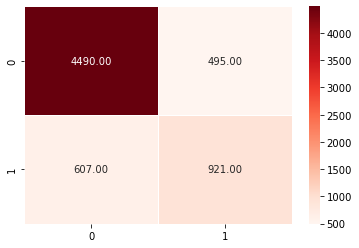

--------------------------------------------------
model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
le score d'entrainement est 0.9085918304668305

l'accuracy du XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
       

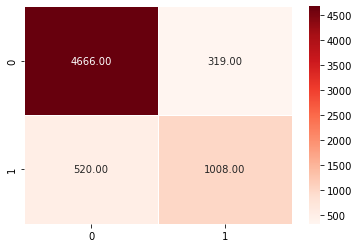

--------------------------------------------------
model <catboost.core.CatBoostClassifier object at 0x00000288FE262580>
Learning rate set to 0.5
0:	learn: 0.4865879	total: 3.46ms	remaining: 0us
le score d'entrainement est 0.8402948402948403

l'accuracy du <catboost.core.CatBoostClassifier object at 0x00000288FE262580> est 84.60

               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4985
           1       0.75      0.51      0.61      1528

    accuracy                           0.85      6513
   macro avg       0.81      0.73      0.76      6513
weighted avg       0.84      0.85      0.84      6513



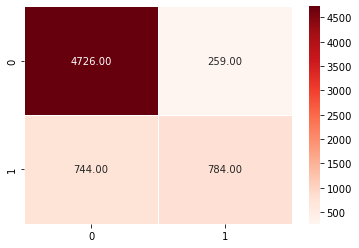

--------------------------------------------------


In [67]:
for i in range(len(models)):
    model_names=list(models.values())[i]
    names=list(models.keys())[i]
    #appliquons la foction machine_learning_model()
    machine_learning_model(model_names,X_train,X_test,y_train,y_test)